In [1]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sentencepiece

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----------------------------- ---------- 0.8/1.1 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 3.4 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tiktoken

   ---------------------------------------- 0.0/884.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/884.3 kB ? eta -:--:--
   ----------------------------------- ---- 786.4/884.3 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 884.3/884.3 kB 2.7 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install sentencepiece


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install sacremoses

   ---------------------------------------- 0.0/897.5 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/897.5 kB ? eta -:--:--
   ---------------------------------------- 897.5/897.5 kB 3.1 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [62]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

comments = ["thanku sir"]
results = classifier(comments)

# Mapping labels
labels = {0: "Negative", 1: "Neutral", 2: "Positive"}
final_output = []

for r in results:
    label_num = int(r["label"].split("_")[-1])  # e.g. LABEL_2 → 2
    final_output.append({"sentiment": labels[label_num], "score": r["score"]})

print(final_output)


Device set to use cpu


[{'sentiment': 'Positive', 'score': 0.6084621548652649}]


In [1]:
import pandas as pd
from transformers import pipeline

# Load dataset
df = pd.read_csv("data/oi1ffu6lBXE_clean.csv")

# Ensure all values are strings (no NaN/float)
df["clean_text"] = df["clean_text"].astype(str).fillna("")

# Initialize classifier
classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Mapping labels
labels = {0: "Negative", 1: "Neutral", 2: "Positive"}

batch_size = 32
all_results = []

for i in range(0, len(df), batch_size):
    batch = df["clean_text"].iloc[i:i+batch_size].tolist()
    results = classifier(batch, truncation=True, padding=True, max_length=512)

    for r in results:
        label_num = int(r["label"].split("_")[-1])
        all_results.append(labels[label_num])

df["sentiment"] = all_results
df.to_csv("data/labeled_comments_2.csv", index=False)
print("✅ Sentiment labeling done and saved to data/labeled_comments.csv")


d:\1 - Hackathons\24 - YouTube Analysis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


✅ Sentiment labeling done and saved to data/labeled_comments.csv


In [2]:
print(df["sentiment"].value_counts())

sentiment
Neutral     211
Positive     86
Negative      3
Name: count, dtype: int64


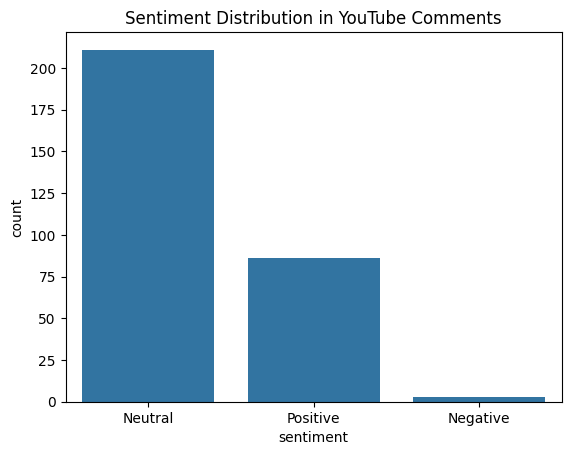

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution in YouTube Comments")
plt.show()


In [4]:
df = pd.read_csv('data/labeled_comments_2.csv')
df.head()

,author,text,likes,clean_text,sentiment
0,@CollegeWallahbyPW,📗 Enroll Now in Decode Batches and become JOB ...,10,greenbook enroll decode batches become job rea...,Neutral
1,@mobrurahmed-ts8ht4ry3r,Mazaa aagaya🎉,0,mazaa aagaya partypopper,Neutral
2,@79SAMYAK_MAHUDWALEBORKAR,C bahut bada hai,0,c bada hai,Neutral
3,@Mdsaif-d5x,❤❤❤😊,0,redheart redheart redheart smilingfacewithsmil...,Positive
4,@Mdsaif-d5x,Nice session ❤,0,nice session redheart,Positive


In [7]:
negative_comments = df[df['sentiment'] == "Neutral"]
print(negative_comments[['clean_text', 'sentiment']])

                                            clean_text sentiment
0    greenbook enroll decode batches become job rea...   Neutral
1                             mazaa aagaya partypopper   Neutral
2                                           c bada hai   Neutral
5                                                  NaN   Neutral
6                                                  NaN   Neutral
..                                                 ...       ...
292  visual studio code used extensions कौनकौन सा ड...   Neutral
293  hello sir maine dcode c dsa batch purchase kiy...   Neutral
294  java oneshot mein dal vaiya slightlysmilingfac...   Neutral
298                                               part   Neutral
299                              anybody tell name sir   Neutral

[211 rows x 2 columns]
